# Principles of Machine Learning WiSe23/24
## Exercise 2 - fitting probabilistic models

#### due: November 19, 2023

---
## task 2.1

In [ ]:
import numpy as np
data = np.loadtxt('whData.dat', dtype=object, comments='#', delimiter=None)
w = data[:,0].astype(float)
h = data[:,1].astype(float)

In [ ]:
import matplotlib.pyplot as plt

def plot_data(height, weight, title='set a title'):
    plt.figure(figsize=(8, 6)) # Set the size of the plot
    plt.scatter(height, weight, color='blue', marker='o') # Create a scatter plot
    plt.title(title) # Title of the plot
    plt.xlabel('Height') # Label for x-axis
    plt.ylabel('Weight') # Label for y-axis
    plt.grid(True) # Show grid
    plt.show() # Display the plot


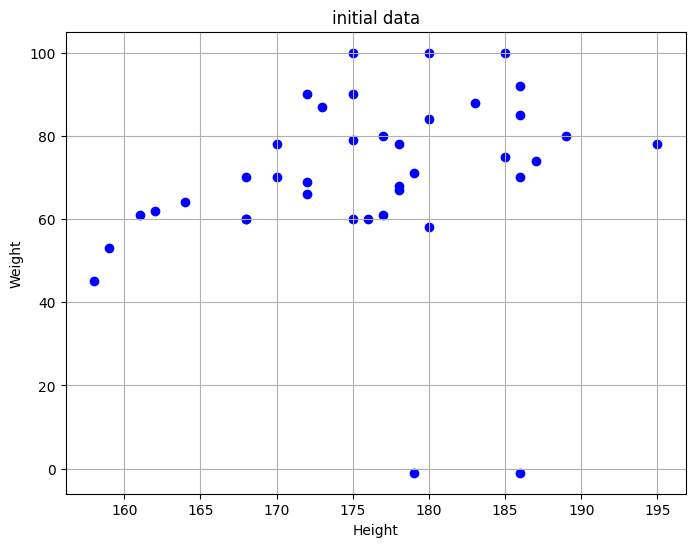

In [ ]:
plot_data(h,w,'initial data')

task 2.1.1

In [ ]:
def pre_process(w, h):
    X = []
    for weight, height in zip(w, h):
        if(weight!=-1):
            X.append(np.array([height, weight]))

    return np.array(X).T

X = pre_process(w, h)

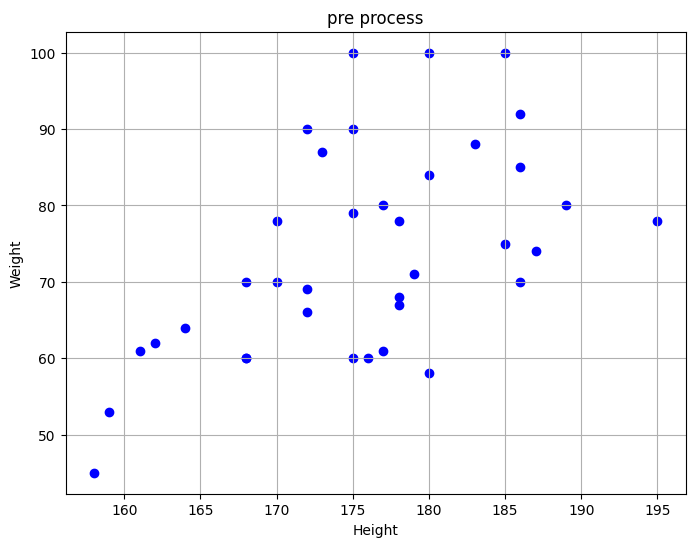

In [ ]:
plot_data(X[0,:],X[1,:],'pre process')

In [ ]:
print(X)


[[176. 158. 180. 186. 168. 168. 164. 178. 170. 189. 195. 172. 187. 180.
  186. 185. 168. 179. 178. 183. 170. 175. 186. 159. 161. 178. 175. 185.
  175. 162. 173. 172. 177. 175. 172. 177. 180.]
 [ 60.  45.  58.  70.  70.  60.  64.  68.  78.  80.  78.  66.  74.  84.
   85.  75.  60.  71.  67.  88.  70.  60.  92.  53.  61.  78. 100. 100.
   79.  62.  87.  69.  61.  90.  90.  80. 100.]]


task 2.1.2

In [ ]:
def ML_bivariate_Gaussian(X):
    mean = np.mean(X, axis=1)
    covariance = np.cov(X)

    return mean, covariance

In [ ]:
mean, covariance = ML_bivariate_Gaussian(X)

print("Mean:\n", mean)
print("Covariance Matrix:\n", covariance)

Mean:
 [175.72972973  73.86486486]
Covariance Matrix:
 [[ 75.92492492  64.5457958 ]
 [ 64.5457958  186.95345345]]


task 2.1.3

In [ ]:
def predict(height):
    mu_hat, sigma_hat = ML_bivariate_Gaussian(X)
    (mu_hat_x, mu_hat_y) = mu_hat
    (sigma_hat_x, sigma_hat_xy, sigma_hat_y, _) = sigma_hat.flatten()
    sigma_hat_x = np.sqrt(sigma_hat_x)
    sigma_hat_y = np.sqrt(sigma_hat_y)
    rho_hat = (sigma_hat_xy) / (sigma_hat_x*sigma_hat_y)

    pred_weight = mu_hat_y + rho_hat *(sigma_hat_y/sigma_hat_x)*(height - mu_hat_x)
    return pred_weight

body_heights = [140, 150, 160, 170, 180, 190, 200, 210]

In [ ]:
heights_to_predict = [140, 150, 160, 170, 180, 190, 200, 210]
predicted_weights = [predict(h) for h in heights_to_predict]

# Print the results
for h, w in zip(heights_to_predict, predicted_weights):
    print(f"Predicted weight for height {h} cm: {w:.2f} kg")

Predicted weight for height 140 cm: 43.49 kg
Predicted weight for height 150 cm: 51.99 kg
Predicted weight for height 160 cm: 60.49 kg
Predicted weight for height 170 cm: 68.99 kg
Predicted weight for height 180 cm: 77.50 kg
Predicted weight for height 190 cm: 86.00 kg
Predicted weight for height 200 cm: 94.50 kg
Predicted weight for height 210 cm: 103.00 kg


---
## Task 2.2


### Task 2.2.1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = np.genfromtxt('myspace.csv', delimiter=',')
data = data[:, 1]
h = np.trim_zeros(data, 'f') #deleting front zeros
t = np.arange(1, len(h) + 1)

In [ ]:
def plot_data_line(t, h, title='Line Graph'):
    # Plotting
    plt.figure(figsize=(6, 4))
    plt.plot(t, h)
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Values')
    plt.tight_layout()
    plt.grid()
    plt.show()

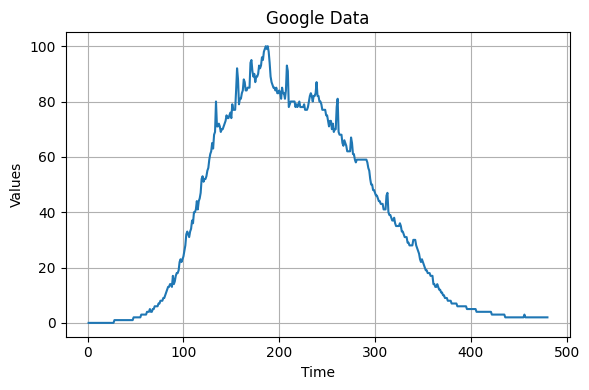

In [ ]:
plot_data_line(np.arange(1, len(data) + 1), data, 'Google Data')

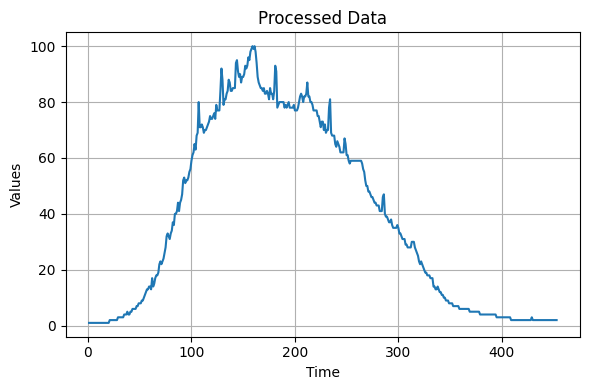

In [ ]:
plot_data_line(t,h, 'Processed Data')

### task 2.2.2

In [ ]:
h_of_ints = np.floor(h).astype(np.int64)
d = np.repeat(t, h_of_ints)


In [ ]:
def iterative_solve(alfa: float, beta: float, iterations: int, N: int, d: np.array):
    """Newton's method for iterative simultaneous equation solving.

    Args:
        alfa (float): initial value ofshape parameter
        beta (float): initial value of scale parameter
        iterations (int): number of iterations
        N (int): length of the input array
        h (np.array): input array

    Returns:
        alfa, beta: shape and scale parameters for Weibull distribution
    """
    for _ in range(iterations):
        L_alfa = N/alfa - N*np.log(beta) + np.sum(np.log(d)) - np.sum(np.power(d/beta, alfa) * np.log(d/beta))
        L_beta = alfa/beta*(np.sum(np.power(d/beta, alfa)) - N)
        L2_alfa = -(N/np.power(alfa,2)) - np.sum(np.power(d/beta, alfa) * np.power(np.log(d/beta),2))
        L2_beta = (alfa/np.power(beta,2))*(N-(alfa+1)*np.sum(np.power(d/beta, alfa)))
        L2_alfa_beta = (1/beta)*np.sum(np.power(d/beta, alfa))+(alfa/beta)*np.sum(np.power(d/beta, alfa) * np.log(d/beta)) - N/beta

        alfabeta_arr = np.array([[alfa],
                                 [beta]])
        first_matrix = np.array([[L2_alfa, L2_alfa_beta],
                                 [L2_alfa_beta, L2_beta]])
        second_matrix = np.array([[-L_alfa],
                                  [-L_beta]])
        #ik it's a pretty lazy solution but eh, didn't want to calculate.
        alfabeta_arr = alfabeta_arr + np.matmul(np.linalg.inv(first_matrix), second_matrix)
        alfa = alfabeta_arr.flatten()[0]
        beta = alfabeta_arr.flatten()[1]
    return alfa, beta

In [ ]:
# # Step 1: Estimate the PMF
# pmf = h / h.sum()

alfa, beta = iterative_solve(alfa=1, beta=1, iterations=20, N = len(d), d=d)

In [ ]:
print(f"shape (alfa) = {alfa}")
print(f"scale (beta) = {beta}")

shape (alfa) = 2.8085601334164503
scale (beta) = 215.42856990275797


In [ ]:
#fittinf the Weibull distribution
#weibull = alfa/beta*np.sign(t/beta)*np.power(np.abs(t/beta),alfa-1)*np.exp(-np.sign(t/beta)*np.power(np.abs(t/beta), alfa))
#Numpy does not seem to allow fractional powers of negative numbers, so np.sign(t/beta)*np.abs((t/beta)) is a work-around

In [ ]:
def weib(x,alfa,beta, A = 1):
    """Weibull distribution

    Args:
        x (array): input array. In the assignment it's t
        beta (float): Scale parameter
        alfa (float): Shape parameter
        A (int, optional): Amplitude parameter. Defaults to 1.

    Returns:
        array: weibull distribution
    """
    return A*((alfa / beta) * ((x / beta)**(alfa - 1)) * np.exp(-((x / beta)**alfa)))

In [ ]:
weibull = weib(t,alfa,beta)

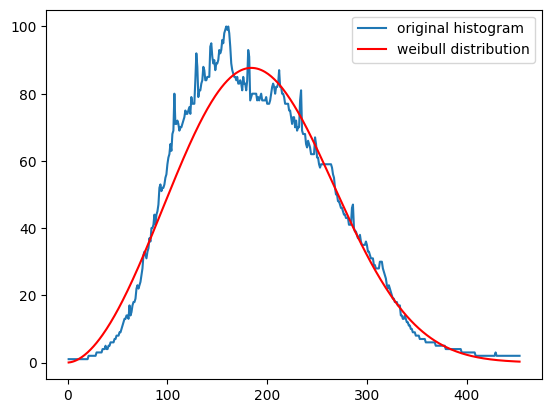

In [ ]:
plt.plot(t,h, label = "original histogram")
plt.plot(t, 17000 * weibull, color="red", label = "weibull distribution")
plt.legend()
plt.show()

In [ ]:
# "elegant" way
# dont create huge dataset d, but only use t as data
# use the histogram counts as weights
def iterative_solve_2(alfa: float, beta: float, iterations: int, N: int, d: np.array, weights: np.array):
    """Newton's method for iterative simultaneous equation solving.

    Args:
        alfa (float): initial value ofshape parameter
        beta (float): initial value of scale parameter
        iterations (int): number of iterations
        N (int): length of the input array
        d (np.array): input array
        weights (np.array): histogram counts

    Returns:
        alfa, beta: shape and scale parameters for Weibull distribution
    """
    for _ in range(iterations):
        L_alfa = N/alfa - N*np.log(beta) + np.sum(np.log(d)*weights) - np.sum(np.power(d/beta, alfa) * np.log(d/beta)*weights)
        L_beta = alfa/beta*(np.sum((np.power(d/beta, alfa))*weights) - N)
        L2_alfa = -(N/np.power(alfa,2)) - np.sum(np.power(d/beta, alfa) * np.power(np.log(d/beta),2)*weights)
        L2_beta = (alfa/np.power(beta,2))*(N-(alfa+1)*np.sum(np.power(d/beta, alfa)*weights))
        L2_alfa_beta = (1/beta)*np.sum(np.power(d/beta, alfa)*weights)+(alfa/beta)*np.sum(np.power(d/beta, alfa) * np.log(d/beta)*weights) - N/beta

        alfabeta_arr = np.array([[alfa],
                                 [beta]])
        first_matrix = np.array([[L2_alfa, L2_alfa_beta],
                                 [L2_alfa_beta, L2_beta]])
        second_matrix = np.array([[-L_alfa],
                                  [-L_beta]])

        alfabeta_arr = alfabeta_arr + np.matmul(np.linalg.inv(first_matrix), second_matrix)
        alfa = alfabeta_arr.flatten()[0]
        beta = alfabeta_arr.flatten()[1]
    return alfa, beta

In [ ]:
alfa2, beta2 = iterative_solve_2(alfa=1, beta=1, iterations=20, N = len(d), d=t, weights=h)

In [ ]:
print(f"shape (alfa2) = {alfa2.round(3)}")
print(f"scale (beta2) = {beta2.round(3)}")
# same results as above

shape (alfa2) = 2.809
scale (beta2) = 215.429


---
## task 2.3

In [ ]:
from scipy.optimize import curve_fit

In [ ]:
# Step 3: Fit the Weibull distribution to the data
initial_guess = [1, 1, 1000]  # Initial guess for Weibull parameters (shape, scale, amplitude)
params, covariance = curve_fit(weib, t, h, p0=initial_guess)

In [ ]:
params

array([2.73096059e+00, 2.11024391e+02, 1.74593973e+04])

In [ ]:
shape, scale, amplitude = params
weibull_distribution = weib(t, shape, scale, amplitude)

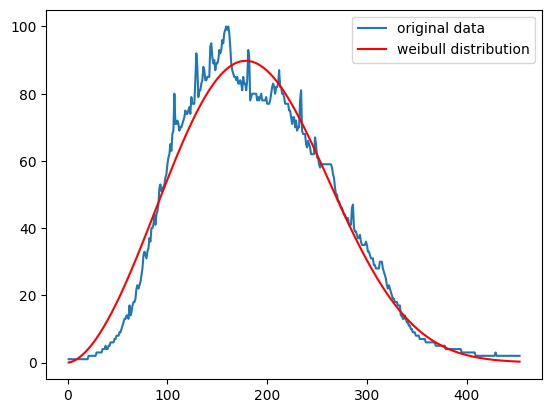

In [ ]:
plt.plot(t, h, label = "original data") #original plot
plt.plot(t, weibull_distribution, color = "red", label = "weibull distribution")
plt.legend()

---
## task 2.4

In [ ]:
# Redefining the Weibull CDF
def weibull_cdf(x, alpha, beta):
    return 1 - np.exp(-(x / beta)**alpha)

# Redefining the residuals function to incorporate the cumulative probabilities
def new_residuals(params, y, x):
    alpha, beta = params
    F = weibull_cdf(x, alpha, beta)
    F_shifted = np.insert(F[:-1], 0, 0)  # Shifting the CDF array for calculating differences
    p = F - F_shifted  # p_i = F_i - F_(i-1)
    expected_counts = np.sum(y) * p  # Expected counts in each bin
    return (y - expected_counts)*np.sqrt(1/expected_counts)

# Applying least squares optimization with the new residuals function
new_result, _ = leastsq(new_residuals, initial_params, args=(h, t))

new_estimated_alpha, new_estimated_beta = new_result
print("New Estimated Alpha:", new_estimated_alpha)
print("New Estimated Beta:", new_estimated_beta)

New Estimated Alpha: 2.6459474526484232
New Estimated Beta: 213.4545358702333


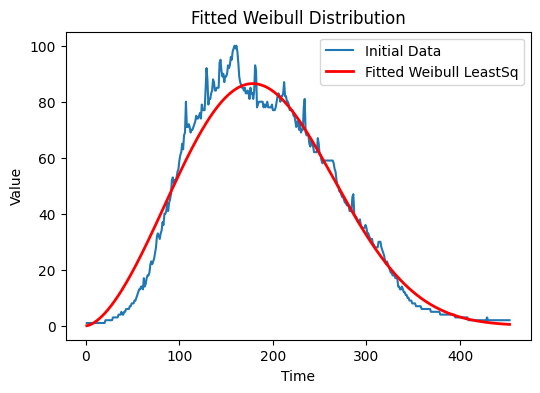

In [ ]:
import matplotlib.pyplot as plt


alpha = new_estimated_alpha
beta = new_estimated_beta

# Generating a range of x values for plotting the Weibull CDF
x_values = np.linspace(min(t), max(t), 1000)
weibull_values = weib(x_values, alpha, beta)


# Plotting
plt.figure(figsize=(6, 4))
plt.plot(t, h, label='Initial Data')
plt.plot(x_values, weibull_values * amplitude, 'r-', lw=2, label='Fitted Weibull LeastSq')
plt.title('Fitted Weibull Distribution')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


---
## task 2.5

[  2.86787678 215.91251485]


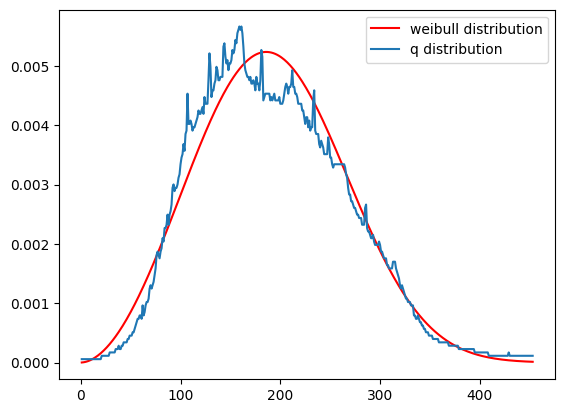

In [ ]:
import scipy
import numpy as np

data = np.genfromtxt('myspace.csv', delimiter=',')
data = data[:, 1]
h = np.trim_zeros(data, 'f') #deleting front zeros
t = np.arange(1, len(h) + 1)
a_init = 2
b_init = 100

def get_q(h):
    factor = 0.98
    sum_h = np.sum(h)
    q = (h / sum_h) * factor
    return q

def D_KL(var, t, q):
    a, b = var
    f = weib(t, a, b)
    return np.sum(f*np.log((f/q)+1e-3))



q = get_q(h)
bounds = ((0, None), (0, None)) # alpha & beta must be positive
optimal_result = scipy.optimize.minimize \
 (D_KL, x0 = (a_init, b_init), args = (t, q), bounds=bounds)

print(optimal_result["x"])
a_opt_min = optimal_result["x"][0]
b_opt_min = optimal_result["x"][1]

plt.plot(t, weib(t, a_opt_min, b_opt_min), color = "red", label = "weibull distribution")
plt.plot(t, q, label = "q distribution")
plt.legend()
plt.show()